No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


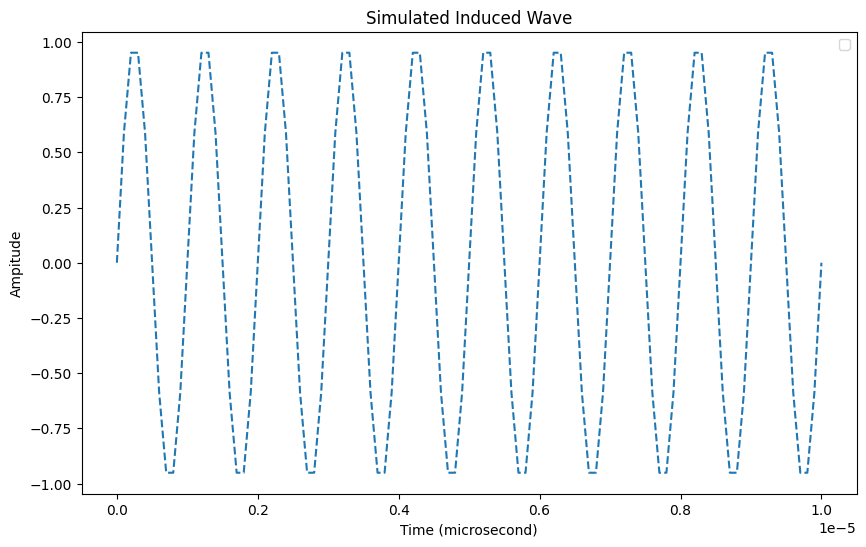

In [10]:
import numpy as np 
import matplotlib.pyplot as plt 

#at this stage we want to create a wave so what we first do is create 
#an a array with the time values with equal interval length between 0 and the time 
#Divide the time period by the 1/sampling rate
#define the sampling rate as the hz that we want to sample at 
#we must use a sampling rate at least 2x the max frequency in the data
#max frequency is 1e6 so from 2 to 3 would be good following the nyquistic theorem
sampling_rate = 10e6 #this is the 5MHZ ....the e symbol means exponent 
duration = 10e-6 #1 microsecond 
time_array = np.arange(0,duration,1/sampling_rate)
#the above function creates a sorted array of values between 
# 0 and 1 millisecond and these are divide by the 1/ sampling_rate
#after we have created the time array we now create a defect free sine wave simulation
#so our formular is that we shall take the the formular so sine and multiply by each value in the time array 
#this shall get us the sine value at each point
#the function for the sine wave is y=a*sin⁡(2 * pi * b.x)
# a is Amplitude ,b is Frequency or Angular fx
# x represents time or position 
#think of bx as  a measure of how the wave repeats its angle or position after time
# if the is + c is the c will represent phase shift 
#the values we need here are frequency 
frequency = 1e6 #1 MHz frequency 
amplitude = 1e6 #this is 1 MPa in Pascals
pulse = np.sin(2 * np.pi * frequency * time_array)
#this the pulse to be pushed out 
#display the pulse graphically 

plt.figure(figsize=(10,6))
plt.plot(time_array,pulse,'--')
plt.xlabel("Time (microsecond)")
plt.ylabel('Ampitude')
plt.title("Simulated Induced Wave")
plt.legend()
plt.show()

In [11]:
#perfoming fast fourier Transform on the wave to put in the frequency domain
from scipy.fft import fft
from scipy.stats import skew,kurtosis
#create a function that extracts the most important features from the data
def extract_features(signal,sampling_rate):
    #Time-domain features 
    max_amplitude = np.max(np.abs(signal))
    #root mean squared value
    #this is a measure of the signals magnitude power or energy
    #single number that represents the effective value of the signal 
    rms_value = np.sqrt(np.mean(signal**2))
    
    #Frequency domain features 
    N = len(signal)
    fft_result = fft(signal)
    freqs =np.fft.fftfreq(N,1/sampling_rate)
    fft_magnitude =np.abs(fft_result)
    #what we have done here is to calculate the number of samples in the signal using n
    #converted the signal from it time-domain represenation into frequency domain-representation
    #generate the frequencies basing of the FFT results of each sampling point
    #compute the absolute value of the power or strength at each sampling point
    
    dominant_freq = freqs[np.argmax(fft_magnitude[:N//2])]
#what this does is it first divides the fft_magnitude array by since its redudant
#np.argmax will return the index of the frequency component with the highest amplitude
#using that index the corresponding frequency is fetched which is the most dominant 


     # Statistical features
    mean_val = np.mean(signal)
    variance_val = np.var(signal)
    skewness_val = skew(signal)
    kurtosis_val = kurtosis(signal)
    
    return {
        'Max Amplitude': max_amplitude,
        'RMS': rms_value,
        'Dominant Frequency': dominant_freq,
        'Mean': mean_val,
        'Variance': variance_val,
        'Skewness': skewness_val,
        'Kurtosis': kurtosis_val
    }

In [14]:
#After we create function to extract this data lets create the echo which would have picked up data(error)
echo_delay=int(0.0004 * sampling_rate)
echo_amplitude = 0.6 #echo with attentuation and a 40% power reduction
echo_signal = np.zeros_like(time_array)
echo_signal[echo_delay:echo_delay+len(pulse)//2] = echo_amplitude * pulse[:len(pulse)//2]
print(f"Shape of echo_signal slice: {echo_signal[echo_delay:echo_delay+len(pulse)//2].shape}")
print(f"Shape of pulse slice: {pulse[:len(pulse)//2].shape}")

# Add noise to the defective signal (simulating a real environment)
noise = 0.05 * np.random.normal(size=time_array.shape)
received_signal = echo_signal + noise


ValueError: could not broadcast input array from shape (50,) into shape (0,)